# Note
1. Melakukan percobaan build_models v3.8 dengan Clasifikasi 06 Class
2. Dilakukan pada hari Kamis, 13 Juni 2024 jam 13.00 WIB
3. Tempat di Lab Data Monetize 

## Clasifikasi disetiap Class
1. Class 1, meliputi:
   Ba, Nya, Nga, Tha

2. Class 2, meliputi:
   Na, Ka

3. Class 3, meliputi:
   Pa, Wa, Dha, Ja, Ma

4. Class 4, meliputi:
   Ta, Ha, La, Ya

5. Class 5, meliputi:
   Ca, Sa, Da

6. Class 6, meliputi:
   Ga, Ra     

# Setup Environment 

In [1]:
# pip install tensorflow

In [2]:
# pip install keras

In [3]:
# pip install opencv-python

In [4]:
# pip install imutils

In [5]:
# pip install matplotlib

In [6]:
# pip install seaborn

In [7]:
# pip install scikit-learn

# Import Library

In [8]:
import pandas as pd
import matplotlib.pyplot as plt  
import os
from os.path import join
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization , Activation,Conv2D
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix 

# Preprocessing

In [9]:
import pandas as pd

path_main = "C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\"
file = path_main + "augmented_labels.csv"
df = pd.read_csv(file)
df.head()

,file_path,label
0,../data/data_preprocessing/v2.6/Class 1\ba_ori...,Class 1
1,../data/data_preprocessing/v2.6/Class 1\ba_ori...,Class 1
2,../data/data_preprocessing/v2.6/Class 1\ba_ori...,Class 1
3,../data/data_preprocessing/v2.6/Class 1\ba_ori...,Class 1
4,../data/data_preprocessing/v2.6/Class 1\ba_ori...,Class 1


Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.6\class 1 is  644
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.6\class 2 is  644
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.6\class 3 is  630
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.6\class 4 is  630
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.6\class 5 is  630
Jumlah File C:\Users\USER-03\W\projects_skripsi\data\data_preprocessing\v2.6\class 6 is  646


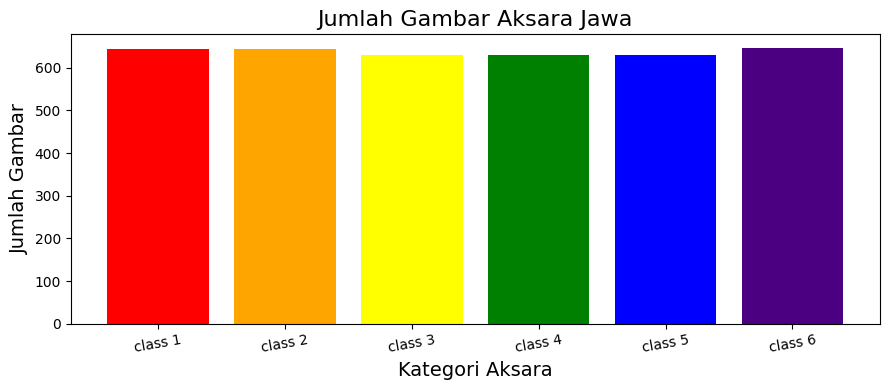

In [10]:
import matplotlib.pyplot as plt
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Jumlah File {link} is ", num_files)

countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\class 1")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\class 2")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\class 3")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\class 4")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\class 5")
countFile("C:\\Users\\USER-03\\W\\projects_skripsi\\data\\data_preprocessing\\v2.6\\class 6")

# Define the input path aksara
aksara_categories = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo']  # Colors for each bar

# Create bar chart
plt.figure(figsize=(9, 4))
plt.bar(aksara_categories, file_counts, color=colors)
plt.xlabel('Kategori Aksara', fontsize=14)
plt.ylabel('Jumlah Gambar', fontsize=14)
plt.title('Jumlah Gambar Aksara Jawa', fontsize=16)
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the input path and aksaraJowo
INPUT_PATH = path_main  # Ganti dengan path ke data Anda
AKSARA = aksara_categories

# Define the target image size
IMAGE_SIZE = (128, 128)

def create_image_generator(input_path, aksaraJowo, image_size):
    for index, jowo in enumerate(aksaraJowo):
        aksara_path = os.path.join(input_path, jowo)
        
        for filename in os.listdir(aksara_path):
            image_path = os.path.join(aksara_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Baca gambar sebagai grayscale
            original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)  # Simpan gambar asli
            grayscale_image = image.copy()  # Simpan gambar grayscale
            image = cv2.resize(image, image_size)  # Resize image
            # Normalisasi tidak diperlukan karena gambar sudah dalam skala 0-255
            image_filtered = apply_log_and_threshold(image)
            
            yield original_image, grayscale_image, image_filtered, index


def load_images(input_path, aksaraJowo, image_size):
    X_original, X_grayscale, X_filtered, y_label = [], [], [], []
    
    for original_image, grayscale_image, image_filtered, label in create_image_generator(input_path, aksaraJowo, image_size):
        X_original.append(original_image)
        X_grayscale.append(grayscale_image)
        X_filtered.append(image_filtered)
        y_label.append(label)
        
    X_original = np.array(X_original)
    X_grayscale = np.array(X_grayscale)
    X_filtered = np.array(X_filtered)
    y_label = to_categorical(np.array(y_label))
    
    return X_original, X_grayscale, X_filtered, y_label

def apply_log_and_threshold(image, kernel_size=9, sigma=0, log_threshold=3):
    # Apply Gaussian Blur
    image_gaussian = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    
    # Apply Laplacian of Gaussian (LoG)
    edges_log = cv2.Laplacian(image_gaussian, cv2.CV_64F, ksize=3)
    
    # Thresholding for Edge Detection Results
    detected_edges_log = np.zeros_like(edges_log)
    detected_edges_log[edges_log > log_threshold] = 255
    
    return detected_edges_log

# Load images with LoG filter and thresholding applied
X_original, X_grayscale, X_filtered, y_label = load_images(INPUT_PATH, AKSARA, IMAGE_SIZE)
input_shape = (128, 128, 1)

# Select one image to display
index_to_display = 0

# Display the original image, grayscale image, and filtered image
original_image = X_original[index_to_display]
grayscale_image = X_grayscale[index_to_display]
filtered_image = X_filtered[index_to_display]

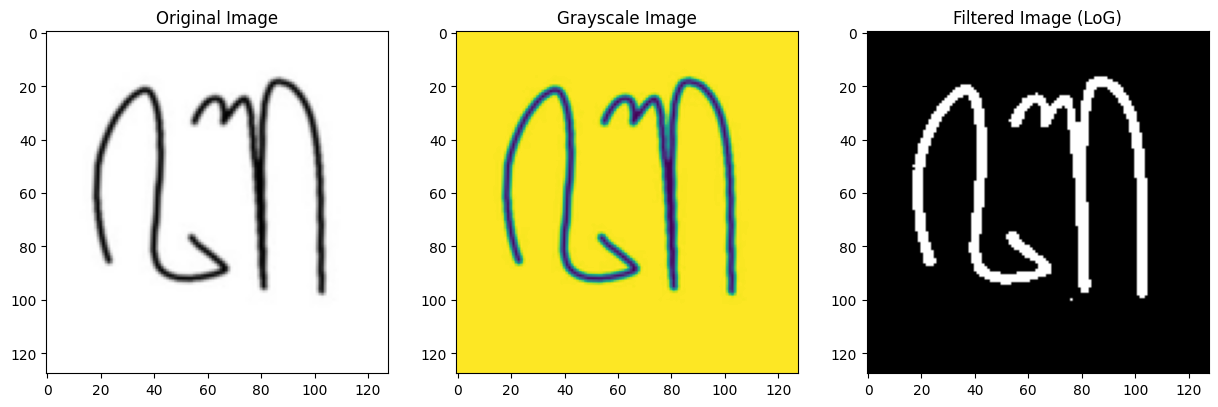

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))  # Konversi BGR ke RGB untuk tampilan yang benar

plt.subplot(1, 3, 2)
plt.title('Grayscale Image')
# plt.imshow(grayscale_image, cmap='gray')
plt.imshow(grayscale_image)

plt.subplot(1, 3, 3)
# plt.subplot(1, 3, 2)
plt.title('Filtered Image (LoG)')
plt.imshow(filtered_image, cmap='gray')

plt.show()

In [13]:
print(f"Bentuk input pada gambar: {IMAGE_SIZE}")


Bentuk input pada gambar: (128, 128)


In [14]:
# Reshape X_grayscale
X_grayscale_reshaped = X_grayscale.reshape(-1, 128, 128, 1)
print("X_grayscale shape after reshape:", X_grayscale_reshaped.shape)

X_grayscale shape after reshape: (3824, 128, 128, 1)


In [15]:
# Train test split 
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_grayscale_reshaped, y_label, test_size=0.3, random_state=45)

In [16]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (2676, 128, 128, 1)
x_test shape (1148, 128, 128, 1)
y_train shape (2676, 6)
y_test shape (1148, 6)


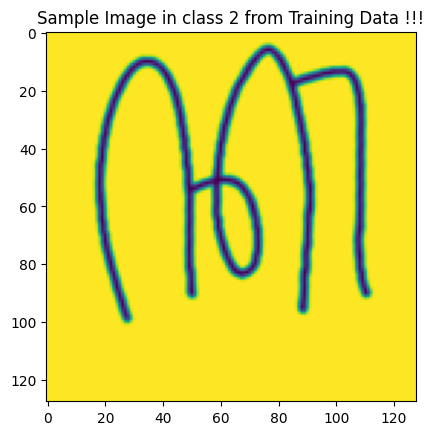

In [17]:
# Menampilkan salah satu gambar dari data pelatihan
# plt.imshow(X_train[0], cmap='gray')
plt.imshow(X_train[0])
plt.title("Sample Image in {} from Training Data !!!".format(AKSARA[np.argmax(y_train[0])]))
plt.axis('on')
plt.show()

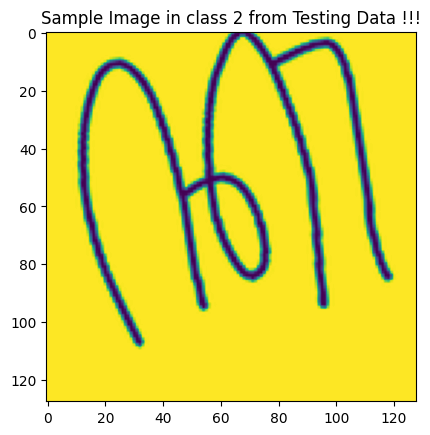

In [18]:
# Menampilkan salah satu gambar dari data pelatihan
# plt.imshow(X_test[0], cmap='gray')
plt.imshow(X_test[0])
plt.title("Sample Image in {} from Testing Data !!!".format(AKSARA[np.argmax(y_test[0])]))
plt.axis('on')
plt.show()

# Build the Model

In [19]:
# import tensorflow as tf
# from tensorflow.keras.utils import plot_model

# from tensorflow.keras.applications import VGG16

# vgg16 = tf.keras.applications.VGG16(
#     input_shape=(128, 128, 3),
#     pooling=max,
#     include_top=False,
#     weights="imagenet")
# vgg16.summary()

In [20]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import layers, initializers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

# Initialize Sequential model
model = Sequential()

# Add VGG16 as a layer
# model.add(vgg16)

# model = models.Sequential()

# Block 1
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001), input_shape=input_shape))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

# Block 2
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 4
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# Dense layers
# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.25))

# model.add(Dense(512, activation='relu', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None)))
model.add(Dense(512, activation='relu'))
# model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer
model.add(Dense(6, activation='softmax'))

# Adam optimizer with learning rate scheduling, Weight Decay, and Gradient Clipping
# opt = Adam(learning_rate=0.0001, weight_decay=1e-4, clipvalue=0.0001)
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, weight_decay=1e-4)
    
# Compile the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 42, 42, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 42, 42, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 10, 10, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,08

 Total params: 16,028,358 (61.14 MB)

 Trainable params: 16,028,358 (61.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history_v1 = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 223s 5s/step - accuracy: 0.1845 - loss: 2.4955 - val_accuracy: 0.1542 - val_loss: 1.7928
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.1665 - loss: 1.9951 - val_accuracy: 0.1542 - val_loss: 1.7945
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.1787 - loss: 1.9315 - val_accuracy: 0.1542 - val_loss: 1.7942
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 321s 6s/step - accuracy: 0.1763 - loss: 1.8971 - val_accuracy: 0.1542 - val_loss: 1.7942
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 265s 6s/step - accuracy: 0.1675 - loss: 1.8976 - val_accuracy: 0.1542 - val_loss: 1.7941
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 249s 6s/step - accuracy: 0.1788 - loss: 1.8665 - val_accuracy: 0.1542 - val_loss: 1.7937
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 267s 6s/step - accuracy: 0.1654 - loss: 1.8444 - val_accuracy: 0.1542 - val_loss: 1.7932
Epoch 8/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 266s 6s/step - accuracy: 0.1569 - loss: 1.8582 - val_accuracy: 0.1542 - v

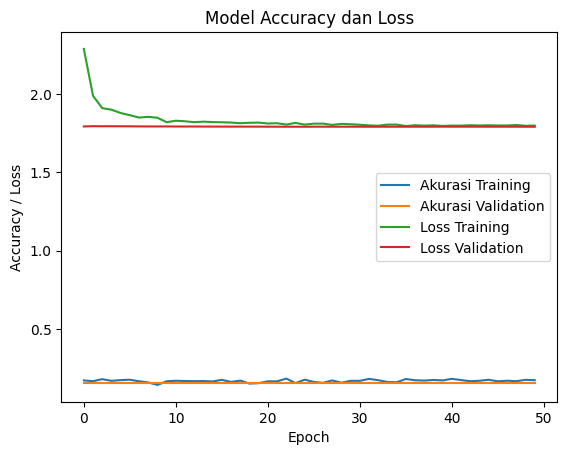

In [22]:
import matplotlib.pyplot as plt

# Plot akurasi training dan validation
plt.plot(history_v1.history["accuracy"], label="Akurasi Training")
plt.plot(history_v1.history["val_accuracy"], label="Akurasi Validation")

# Plot loss training dan validation
plt.plot(history_v1.history["loss"], label="Loss Training")
plt.plot(history_v1.history["val_loss"], label="Loss Validation")

# Label dan judul plot
plt.title("Model Accuracy dan Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy / Loss")
plt.legend()

# Tampilkan plot
plt.show()

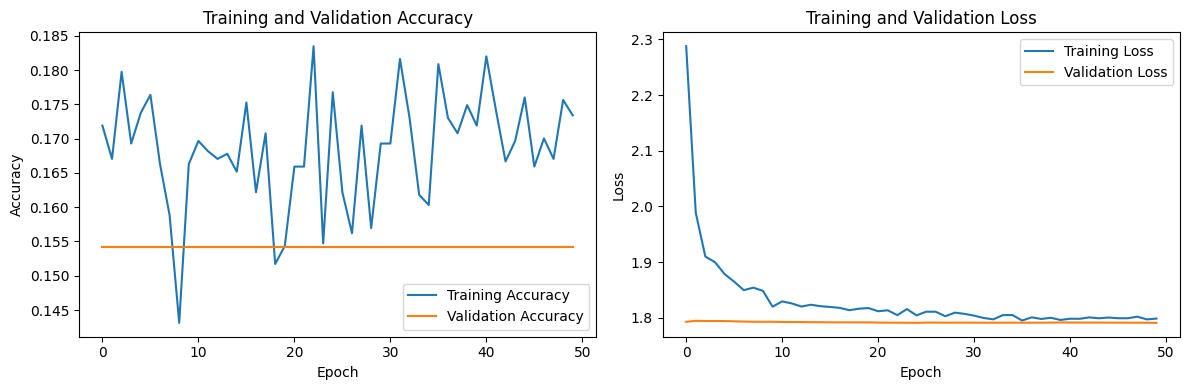

In [23]:
# Menampilkan grafik training dan validation accuracy
import matplotlib.pyplot as plt

acc = history_v1.history['accuracy']
val_acc = history_v1.history['val_accuracy']

loss = history_v1.history['loss']

val_loss = history_v1.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [24]:
# Evaluasi model menggunakan data uji
loss, acc = model.evaluate(X_test, y_test)

# Print hasil evaluasi
print("Loss:", loss)
print("Accuracy:", acc)

36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 589ms/step - accuracy: 0.1585 - loss: 1.7907
Loss: 1.7908586263656616
Accuracy: 0.15418118238449097


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score
from sklearn import metrics


# Prediksi menggunakan model pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Hitung dan tampilkan classification report
report = metrics.classification_report(y_true_classes, y_pred_classes, target_names=AKSARA)
print(report)

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precision:", precision)

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print("Recall:", recall)

# F1-score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print("F1-score:", f1)

# Log Loss
logloss = log_loss(y_test, y_pred)
print("Log Loss:", logloss)

36/36 ━━━━━━━━━━━━━━━━━━━━ 22s 598ms/step
              precision    recall  f1-score   support

     class 1       0.15      1.00      0.27       177
     class 2       0.00      0.00      0.00       202
     class 3       0.00      0.00      0.00       190
     class 4       0.00      0.00      0.00       180
     class 5       0.00      0.00      0.00       188
     class 6       0.00      0.00      0.00       211

    accuracy                           0.15      1148
   macro avg       0.03      0.17      0.04      1148
weighted avg       0.02      0.15      0.04      1148

Accuracy: 0.15418118466898956
Precision: 0.02377183770593306
Recall: 0.15418118466898956
F1-score: 0.04119255801722438
Log Loss: 1.7908588308370863


c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

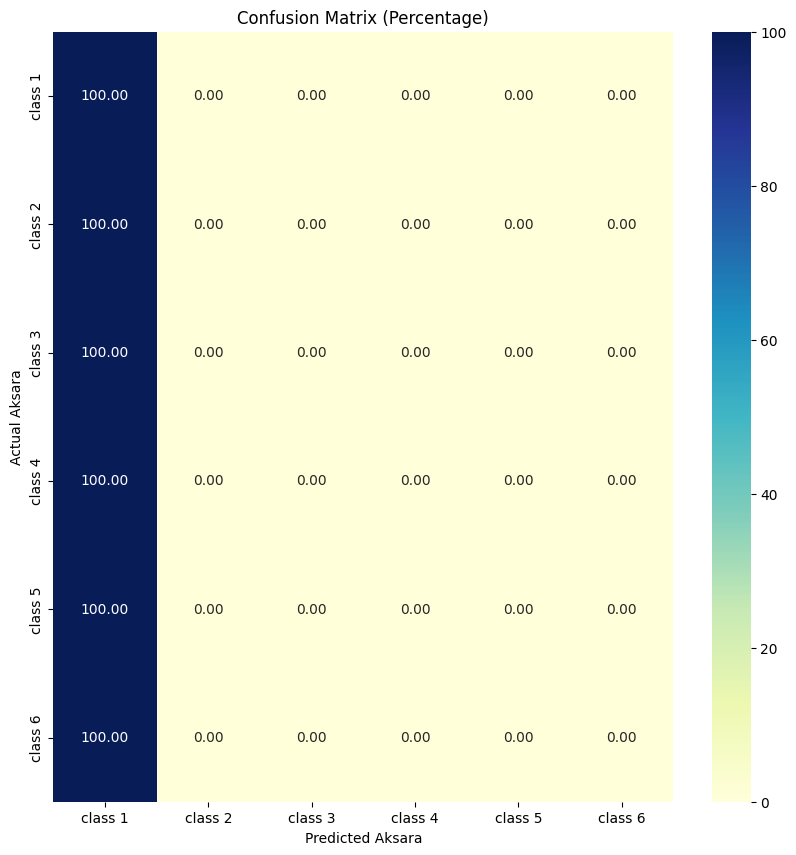

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Hitung total sampel untuk setiap kelas aktual
total_per_class = np.sum(cm, axis=1)

# Konversi setiap elemen dalam confusion matrix menjadi persentase
cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# Display Confusion Matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=AKSARA, yticklabels=AKSARA)
plt.xlabel("Predicted Aksara")
plt.ylabel("Actual Aksara")
plt.title("Confusion Matrix (Percentage)")
plt.show()

In [27]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import matplotlib.pyplot as plt

# # Make predictions
# y_pred = model.predict(X_test)

# # Compute ROC curve and ROC AUC for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(8):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC AUC score
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
# roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

# # Plot the ROC curves for each class and the micro-average ROC curve
# plt.figure(figsize=(8, 6))
# lw = 2
# plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
#                                                    ''.format(roc_auc["micro"]))
# colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
# for i, color in zip(range(8), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of {0} (AUC = {1:0.2f})'.format(aksara_categories[i], roc_auc[i]))
    
# plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=14)
# plt.ylabel('True Positive Rate', fontsize=14)
# plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
# plt.legend(loc="lower right", fontsize=12)
# plt.show()

In [28]:
# from sklearn.metrics import classification_report, accuracy_score,roc_curve,confusion_matrix

# y_test_int = np.argmax(y_test, axis=1)
# y_pred = model.predict(X_test)
# y_pred_int = np.argmax(y_pred, axis=1)

# print(classification_report(y_test_int, y_pred_int))

In [29]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# plt.figure(figsize=(10, 10))
# cm = confusion_matrix(y_test_int, y_pred_int)

# # Hitung total sampel untuk setiap kelas aktual
# total_per_class = np.sum(cm, axis=1)

# # Konversi setiap elemen dalam confusion matrix menjadi persentase
# cm_percent = (cm.astype('float') / total_per_class[:, np.newaxis]) * 100

# # Gunakan label langsung dari variabel Aksara
# emotions_labels = aksara_categories

# sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=emotions_labels, yticklabels=emotions_labels)
# plt.xlabel("Predicted Emotions")
# plt.ylabel("Actual Emotions")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()